# Mini Project: Dry Bean Type Classification
# Supervised Machine Learning – Multiclass Classification
# SUMIT CHAKRABORTY
# BATCH-12

# Task:
## 1. Introduction.
This project focuses on automating the classification of dry bean types using supervised machine
learning techniques. Manual classification is time-consuming and error-prone; this solution
improves efficiency, accuracy, and scalability for agricultural quality control systems.
## 2. Dataset Description.
The dataset consists of physical characteristics of dry beans captured using camera-based
computer vision systems. It includes 16 numerical features such as area, perimeter, axis lengths,
shape factors, and one target class representing seven different bean types.
## 3. Exploratory Data Analysis.
Exploratory Data Analysis revealed strong correlations between size-related features such as area,
perimeter, and axis lengths. Class imbalance was observed, which required special handling
techniques like SMOTE.
## 4. Data Preprocessing.
The data was checked for missing values (none found). Feature scaling was applied using
StandardScaler. The target variable was label-encoded, and the dataset was split using stratified
sampling.
## 5. Model Building & Skewness Treatment.
Multiple supervised learning models were trained, including Logistic Regression, Decision Tree,
Random Forest, KNN, SVM, Naive Bayes, and Gradient Boosting. Cross-validation was applied to
assess model stability.
## 6. Class Imbalance Handling.
SMOTE (Synthetic Minority Over-sampling Technique) was used to balance the class distribution in
the training data, leading to improved performance on minority classes.
## 7. Model Evaluation.
Models were evaluated using accuracy, precision, recall, F1-score, and confusion matrices.
Random Forest emerged as the best-performing model with strong generalization and minimal
overfitting.
## 8. Create the Comparison Table.
Logistic Regression , Decision Tree , Random Forest , SVM , KNN , Naive Bayes
## 9. Best Model Identification.
## 10. Streamlit Application.
A Streamlit-based web application was developed to allow users to input bean measurements and
receive real-time classification results. This demonstrates the practical usability of the model.

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Imbalance handling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"Worksheet in Beans Multiclass Classification.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

##  Exploratory Data Analysis (EDA):

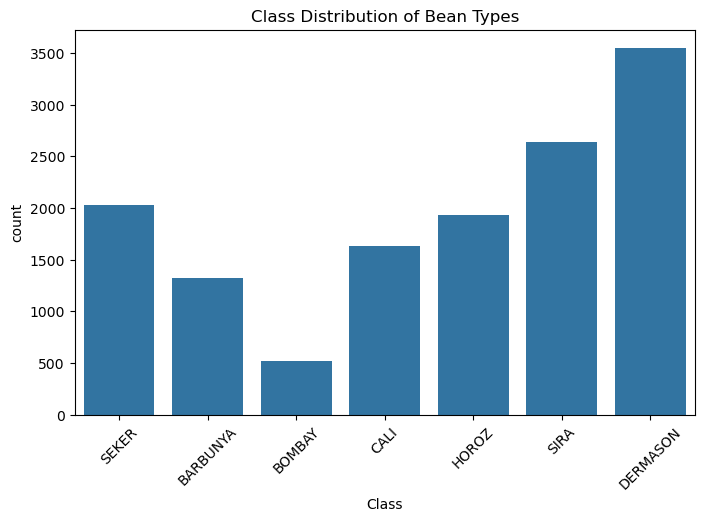

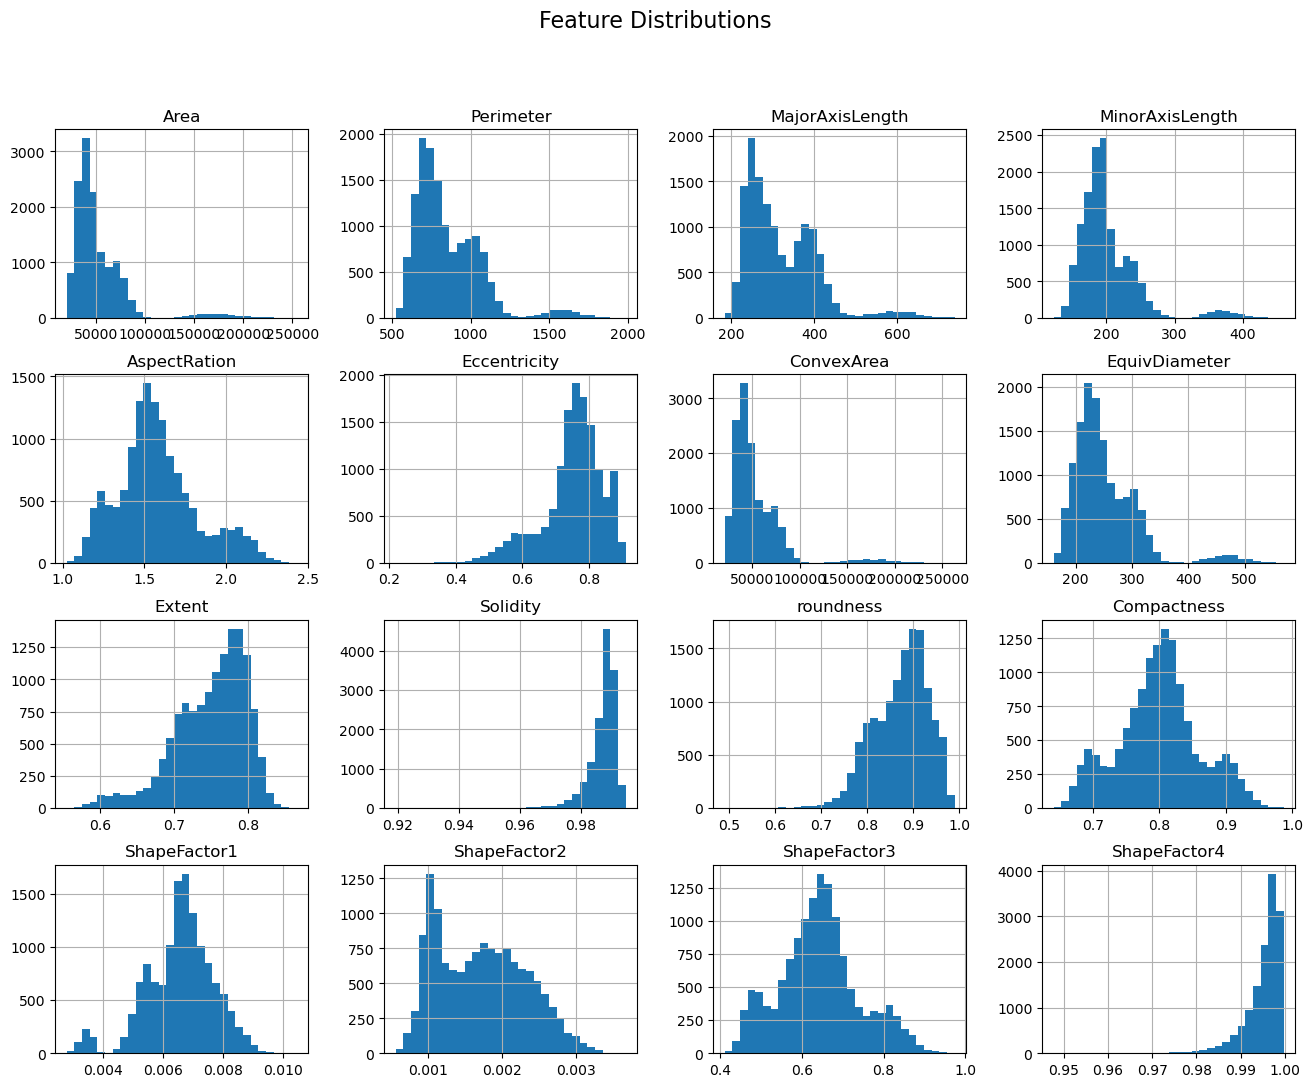

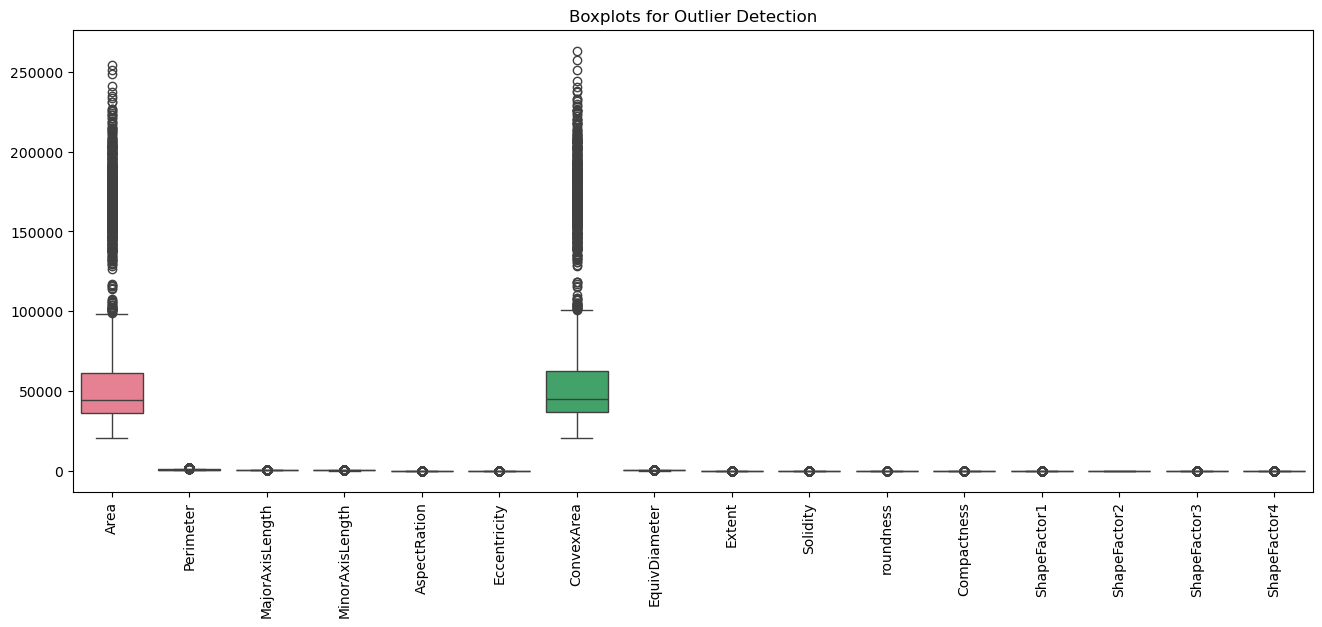

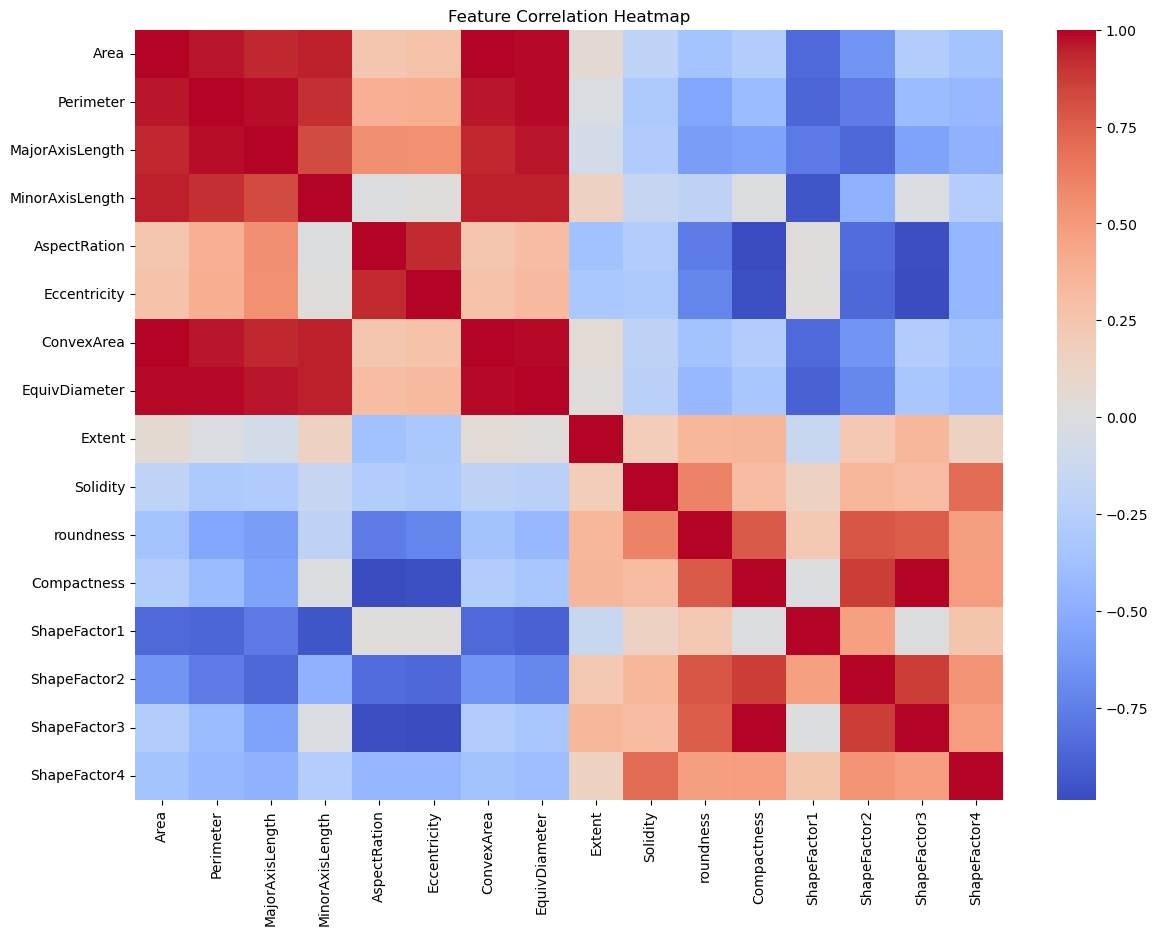

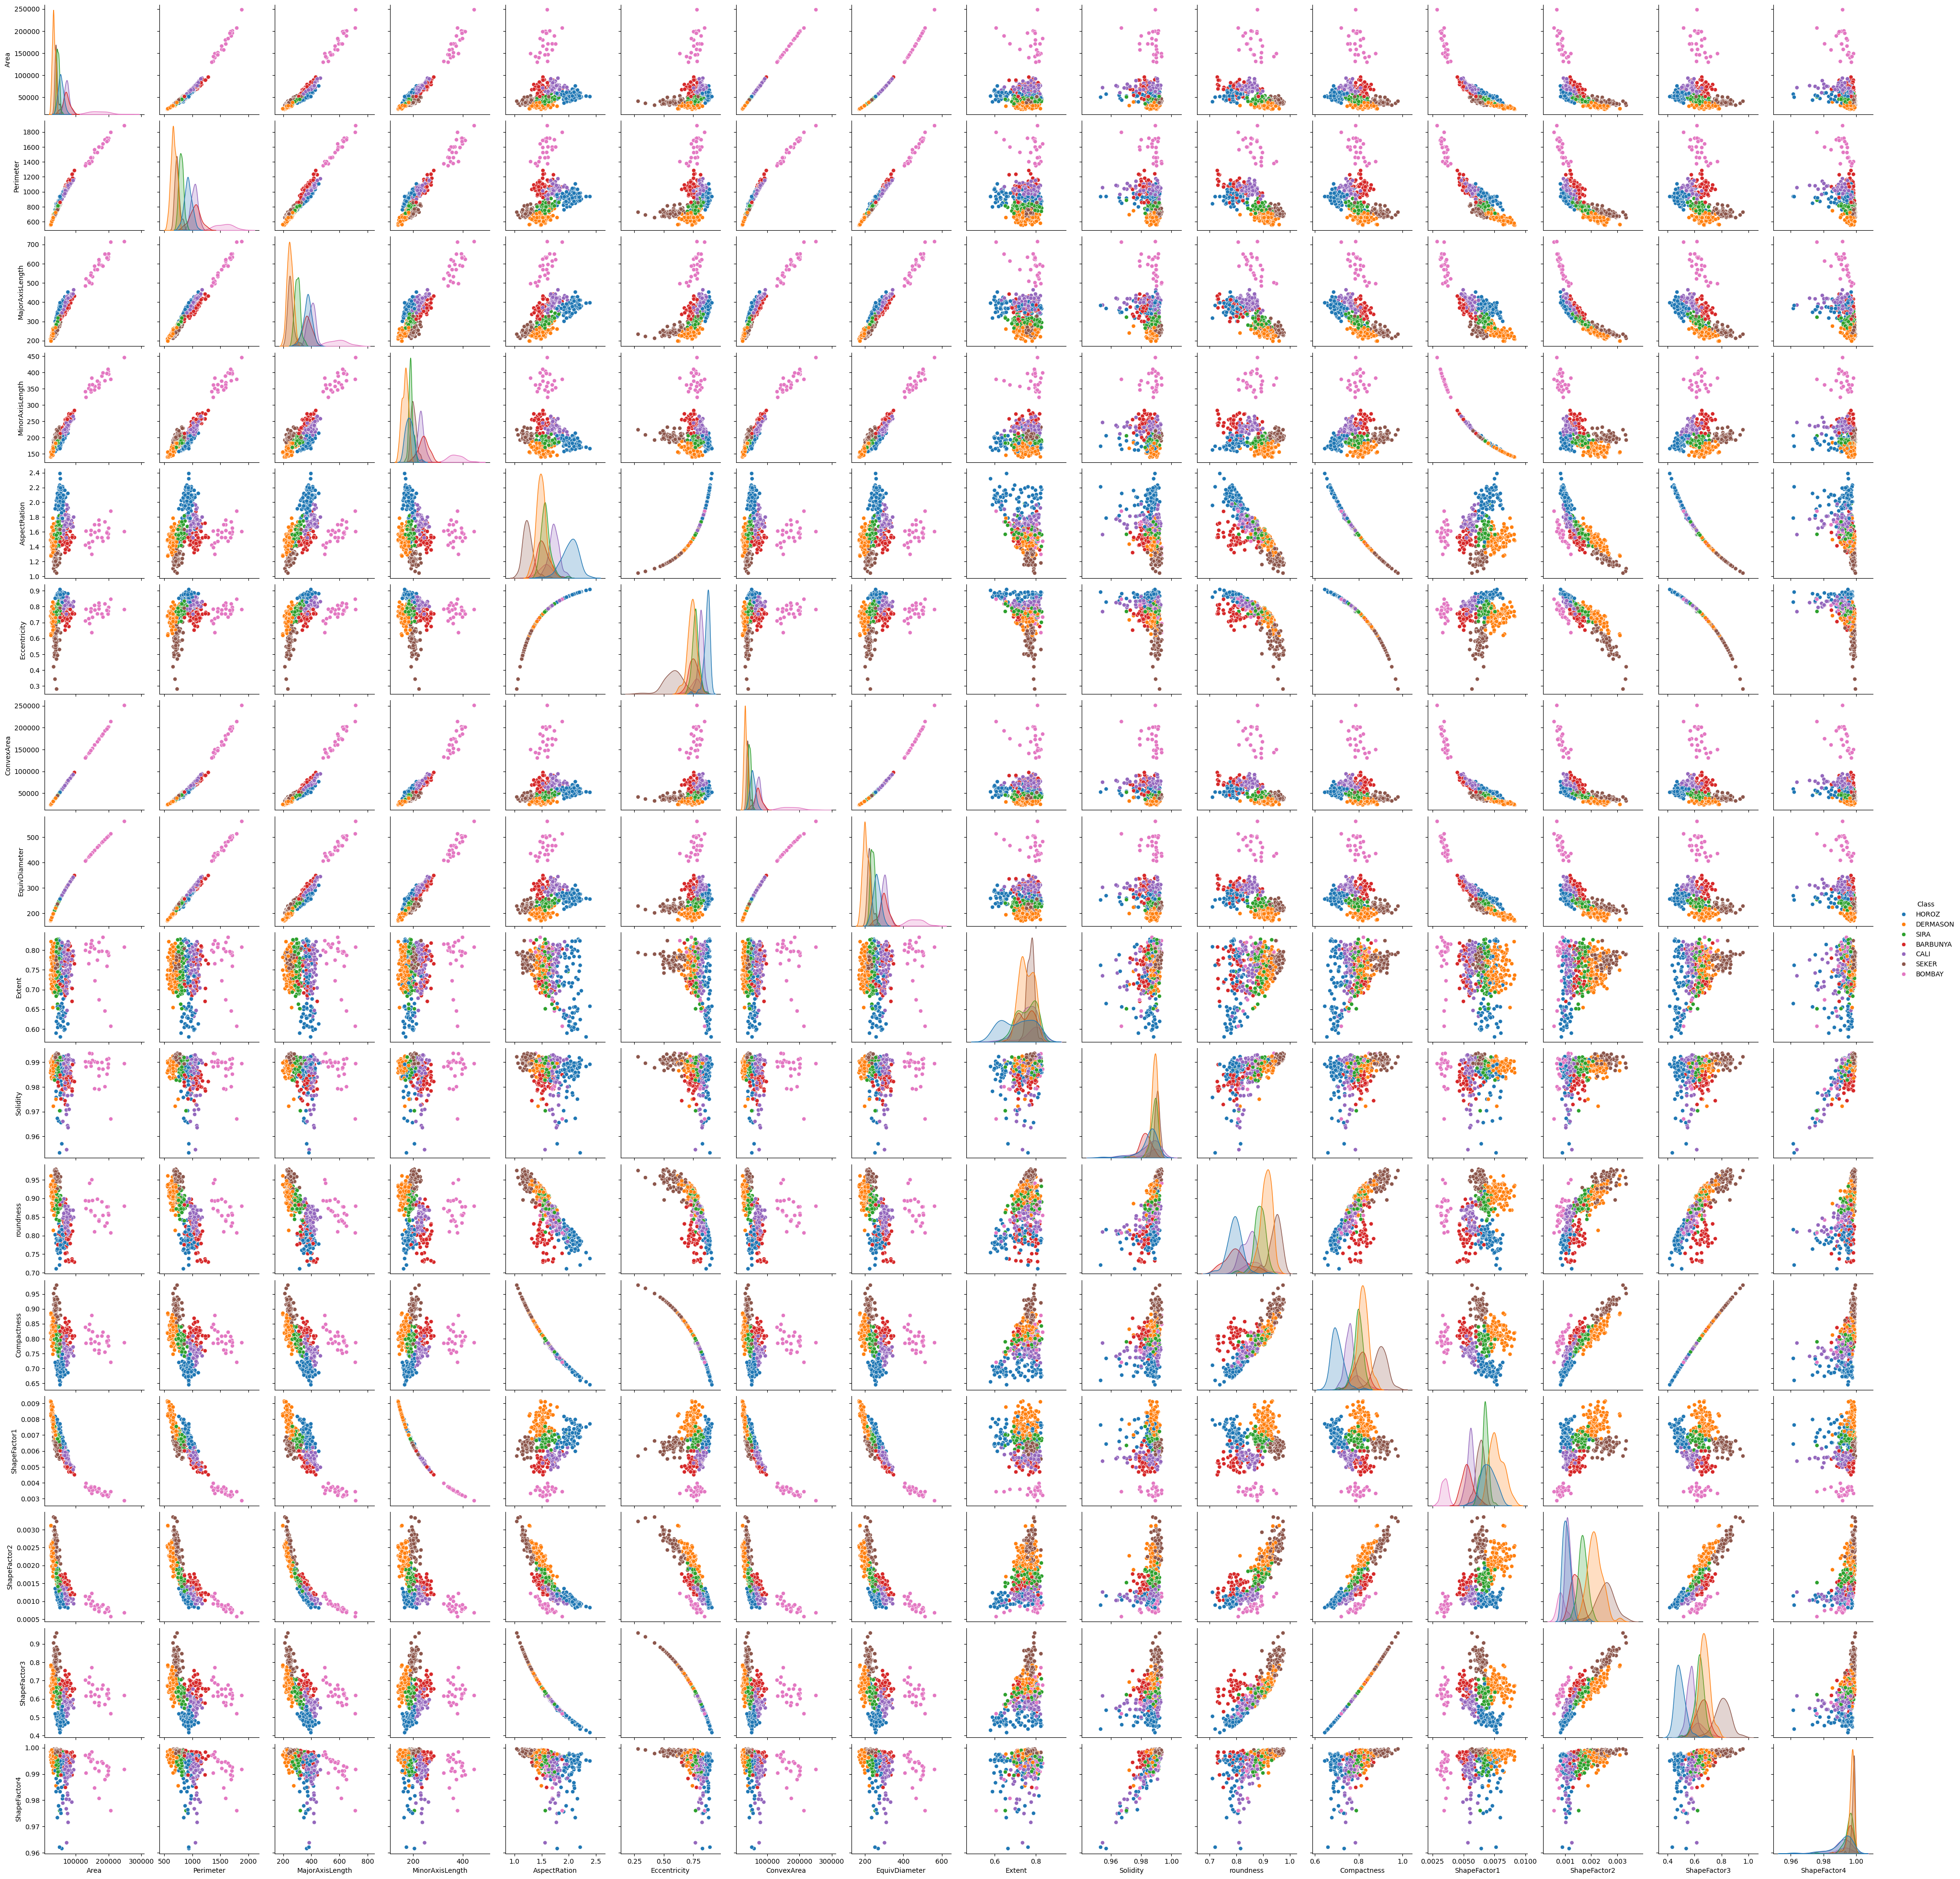

In [3]:
## Class Distribution:
plt.figure(figsize=(8,5))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution of Bean Types")
plt.xticks(rotation=45)
plt.show()

## Feature Distributions:
df.drop("Class", axis=1).hist(figsize=(16,12), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

## Boxplots for Outlier Detection:
plt.figure(figsize=(16,6))
sns.boxplot(data=df.drop("Class", axis=1))
plt.xticks(rotation=90)
plt.title("Boxplots for Outlier Detection")
plt.show()


## Correlation Heatmap:
plt.figure(figsize=(14,10))
sns.heatmap(df.drop("Class", axis=1).corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## Pairplot:
sns.pairplot(df.sample(500), hue="Class")
plt.show()

## Skewness Treatment :

In [4]:
# Check for skewness in numerical features
skewness = df.drop("Class", axis=1).skew().sort_values(ascending=False)
print("Feature Skewness:\n", skewness)

# Fix highly skewed features (e.g., skew > 0.75) using Log Transformation
high_skew = skewness[abs(skewness) > 0.75].index
for col in high_skew:
    df[col] = np.log1p(df[col])
    

Feature Skewness:
 Area               2.952931
ConvexArea         2.941821
MinorAxisLength    2.238211
EquivDiameter      1.948958
Perimeter          1.626124
MajorAxisLength    1.357815
AspectRation       0.582573
ShapeFactor2       0.301226
ShapeFactor3       0.242481
Compactness        0.037115
ShapeFactor1      -0.534141
roundness         -0.635749
Extent            -0.895348
Eccentricity      -1.062824
Solidity          -2.550093
ShapeFactor4      -2.759483
dtype: float64


## Missing Values & Outlier Treatment:

In [5]:
## Missing Values:
df.isnull().sum()

## Outlier Handling:
# Select only numerical columns.
num_df = df.select_dtypes(include=[np.number])

# IQR calculation .
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

# Outlier filtering .
df_iqr = df[~((num_df < (Q1 - 1.5 * IQR)) | 
              (num_df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_iqr.shape

(10468, 17)

## Feature Engineering & Preprocessing:

In [6]:
## Encode Target Variable:
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])

## Feature Scaling:
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train–Test Split:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

## Model Building – Multiple Classifiers :

In [7]:
## Model Dictionary:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}


## Train & Evaluate Models :
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    f1 = classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]
    
    results.append([name, train_acc, test_acc, f1])
print(pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "F1 Score"]))

                 Model  Train Accuracy  Test Accuracy  F1 Score
0  Logistic Regression        0.925422       0.921043  0.921227
1        Decision Tree        1.000000       0.895336  0.895177
2        Random Forest        1.000000       0.921043  0.920974
3                  SVM        0.933688       0.922879  0.922896
4                  KNN        0.943240       0.915534  0.915691
5          Naive Bayes        0.895940       0.897172  0.897353
6    Gradient Boosting        0.962987       0.922512  0.922530


## Handling Class Imbalance :

In [8]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

rf_smote = LogisticRegression()
rf_smote.fit(X_res, y_res)

print("SMOTE Test Accuracy:", rf_smote.score(X_test, y_test))


SMOTE Test Accuracy: 0.9188395152405435


In [11]:
log_reg = LogisticRegression(
    max_iter=1000,           # Increase iterations for convergence
    random_state=42,
    solver='lbfgs',          # Good for multiclass problems
    multi_class='multinomial' # For multiclass classification
)

# Train the model on SMOTE-balanced data
log_reg.fit(X_res, y_res)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [ ]:
print("\nStep 3: Making predictions...")
y_train_pred = log_reg.predict(X_res)
y_test_pred = log_reg.predict(X_test)



Step 3: Making predictions...


array([3, 1, 6, ..., 4, 2, 3], shape=(2723,))

In [14]:
# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000, 2000]
}

# Grid search
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, multi_class='multinomial'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_res, y_res)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'C': 100, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}
Best CV Score: 0.9402


## Model Evaluation & Overfitting Check :

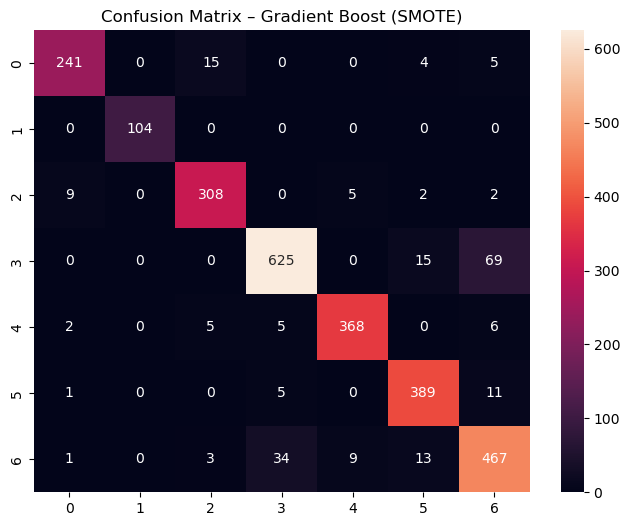

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.93      0.88      0.91       709
       HOROZ       0.96      0.95      0.96       386
       SEKER       0.92      0.96      0.94       406
        SIRA       0.83      0.89      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Train Accuracy: 0.941034291756886
Test Accuracy : 0.9188395152405435


In [15]:
## Confusion Matrix :
y_pred = rf_smote.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix – Gradient Boost (SMOTE)")
plt.show()


## Classification Report :
print(classification_report(y_test, y_pred, target_names=le.classes_))

## Overfitting Check :
print("Train Accuracy:", rf_smote.score(X_res, y_res))
print("Test Accuracy :", rf_smote.score(X_test, y_test))

In [16]:
best_log_reg = grid_search.best_estimator_
best_test_accuracy = best_log_reg.score(X_test, y_test)
print(f"Best Model Test Accuracy: {best_test_accuracy:.4f}")
best_model = best_log_reg

Best Model Test Accuracy: 0.9163


In [17]:
import joblib
joblib.dump(le,"lebel.pkl")
joblib.dump(scaler,"scaler.pkl")
joblib.dump(best_model,"model.pkl")

['model.pkl']

## Model Comparison Table :

In [18]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    f1 = classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]
    
    # Logic for Overfitting (Y/N) - if difference > 5%
    overfitting = "Yes" if (train_acc - test_acc) > 0.05 else "No"
    
    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "F1 Score": f1,
        "Overfitting (Y/N)": overfitting
    })

comparison_df = pd.DataFrame(results)
display(comparison_df)

Model  Train Accuracy  Test Accuracy  F1 Score  \
0  Logistic Regression        0.925422       0.921043  0.921227   
1        Decision Tree        1.000000       0.892031  0.891841   
2        Random Forest        1.000000       0.921777  0.921712   
3                  SVM        0.933688       0.922879  0.922896   
4                  KNN        0.943240       0.915534  0.915691   
5          Naive Bayes        0.895940       0.897172  0.897353   
6    Gradient Boosting        0.962987       0.922512  0.922530   

  Overfitting (Y/N)  
0                No  
1               Yes  
2               Yes  
3                No  
4                No  
5                No  
6                No

## Cross-Validation :


In [19]:
from sklearn.model_selection import cross_val_score

# Example for the top model (Gradient Boosting)
cv_scores = cross_val_score(
    models["Logistic Regression"], 
    X_res, y_res,  # Use SMOTE data
    cv=5
)
print(f"Logistic Regression CV Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Logistic Regression CV Mean Accuracy: 0.9400 (+/- 0.0042)


## Build a Simple Classifier App :
## •	Use Streamlit to create a basic UI .
## •	Input physical measurements of a bean and get predicted class .

## Conclusion.
This project successfully demonstrates the application of machine learning in Agri-Tech. The
automated system reduces manual labor, improves classification accuracy, and provides a scalable
solution for industrial deployment.